     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.3/459.3 kB 8.3 MB/s eta 0:00:00a 0:00:01
Training Accuracy:  0.7915309446254072
Testing Accuracy:  0.7207792207792207
Model saved at: ../models/diabetes_model_with_shap.sav

Initializing SHAP explanations...

Feature Importance Visualization:


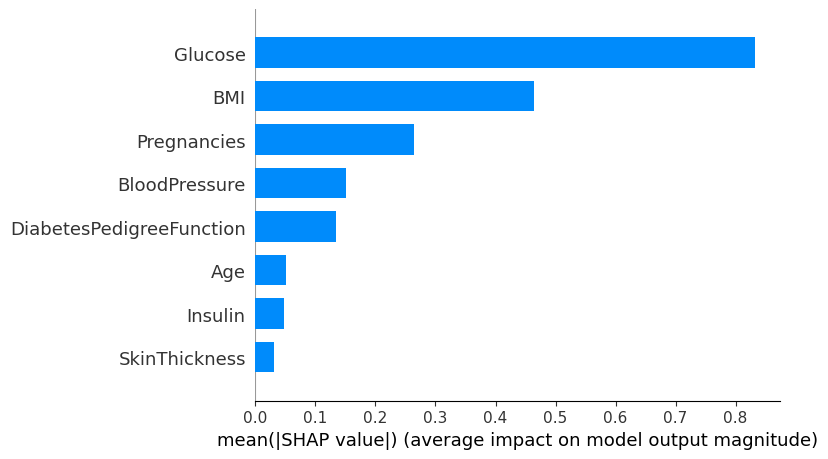

The person is DIABETIC.

Generating SHAP explanation for the given input...


/Users/shivamdubey/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/shivamdubey/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


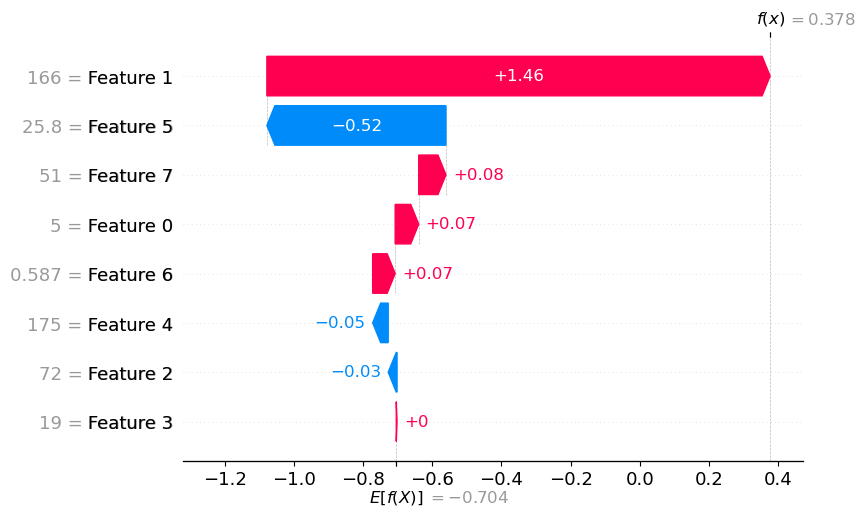


Detailed SHAP explanations for the test dataset:


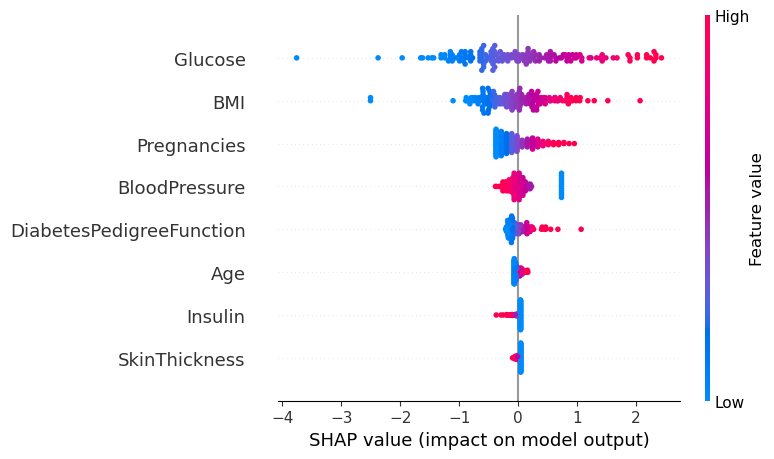

In [3]:
# Importing necessary libraries
!pip install shap

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import shap
import pickle

# Step 1: Load the diabetes dataset
diabetes_dataset = pd.read_csv('../dataset/diabetes.csv')

# Step 2: Data preparation
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Step 3: Train the model
classifier = SVC(kernel='linear', probability=True, random_state=42)
classifier.fit(X_train, Y_train)

# Evaluate model accuracy
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Training Accuracy: ', training_data_accuracy)
print('Testing Accuracy: ', test_data_accuracy)

# Step 4: Save the trained model
model_path = '../models/diabetes_model_with_shap.sav'
pickle.dump(classifier, open(model_path, 'wb'))
print(f'Model saved at: {model_path}')

# Step 5: Explain predictions using SHAP
print("\nInitializing SHAP explanations...")
explainer = shap.Explainer(classifier, X_train)
shap_values = explainer(X_test)

# Global SHAP explanations: Feature importance
print("\nFeature Importance Visualization:")
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Step 6: Make a prediction for a single input
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

# Predicting the outcome
prediction = classifier.predict(input_data_as_numpy_array)
prediction_probability = classifier.predict_proba(input_data_as_numpy_array)

if prediction[0] == 0:
    print("The person is NOT diabetic.")
else:
    print("The person is DIABETIC.")

# SHAP explanation for the single input
print("\nGenerating SHAP explanation for the given input...")
shap_single = explainer(input_data_as_numpy_array)
shap.waterfall_plot(shap_single[0])

# Step 7: Feature-level visualization for the entire test dataset
print("\nDetailed SHAP explanations for the test dataset:")
shap.summary_plot(shap_values, X_test)
